# Car Price Prediction

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\Wasim\Downloads\pakwheels.csv')
df.head()

,Make,Year,Mileage,Type,Transmission,CC,Price
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,2007.0,"100,000 km",Petrol,Automatic,1800 cc,PKR 16.5 lacs
1,Suzuki Mehran VX Euro II 2012,2012.0,"100,000 km",Petrol,Manual,800 cc,PKR 7 lacs
2,Honda Civic EX 1995,1995.0,999 km,Petrol,Manual,1500 cc,PKR 7.6 lacs
3,Toyota Fortuner 2.7 VVTi 2013,2013.0,"94,000 km",Petrol,Automatic,2700 cc,PKR 70 lacs
4,Suzuki Mehran VX Euro II 2015,2015.0,"86,000 km",Petrol,Manual,796 cc,PKR 8 lacs


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89956 entries, 0 to 89955
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          89956 non-null  object 
 1   Year          87449 non-null  float64
 2   Mileage       89954 non-null  object 
 3   Type          89001 non-null  object 
 4   Transmission  89954 non-null  object 
 5   CC            89954 non-null  object 
 6   Price         89954 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


In [4]:
df.isna().sum()

Make               0
Year            2507
Mileage            2
Type             955
Transmission       2
CC                 2
Price              2
dtype: int64

In [5]:
df.describe(include='all')

,Make,Year,Mileage,Type,Transmission,CC,Price
count,89956,87449.000000,89954,89001,89954,89954,89954
unique,9852,NaN,9609,3,2,205,2224
top,Suzuki Alto VXR 2022,NaN,"100,000 km",Petrol,Automatic,1000 cc,Call for price
freq,924,NaN,4035,82049,46545,17975,1405
mean,NaN,2012.861576,NaN,NaN,NaN,NaN,NaN
std,NaN,7.669485,NaN,NaN,NaN,NaN,NaN
min,NaN,1990.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN


# 1- Handle values under Make column

Create individual columns for vehicle name, variant from title columns

Get company name from make column. We can also get model name but there will be hundreds of model against each company which will add more dimentionality to data. 

In [6]:
df['Make'].str.split(' ')[0][0]
df['Make'] = df.Make.apply(lambda x:(x.split(' ')[0]))
df['Make']

0           Honda
1          Suzuki
2           Honda
3          Toyota
4          Suzuki
           ...   
89951    Daihatsu
89952       Honda
89953      Toyota
89954      Suzuki
89955      Toyota
Name: Make, Length: 89956, dtype: object

In [7]:
makes_count = df['Make'].value_counts()
makes_count

Toyota        29114
Suzuki        26884
Honda         17382
Daihatsu       3203
KIA            2598
              ...  
Hummer            1
Mushtaq           1
Golden            1
Citroen           1
Oldsmobile        1
Name: Make, Length: 73, dtype: int64

In [9]:
makes_to_delete = makes_count[makes_count < 1000].index

#delete companies having dataset less than 1000
filtered_df = df[~df['Make'].isin(makes_to_delete)]

filtered_df.head()

,Make,Year,Mileage,Type,Transmission,CC,Price
0,Honda,2007.0,"100,000 km",Petrol,Automatic,1800 cc,PKR 16.5 lacs
1,Suzuki,2012.0,"100,000 km",Petrol,Manual,800 cc,PKR 7 lacs
2,Honda,1995.0,999 km,Petrol,Manual,1500 cc,PKR 7.6 lacs
3,Toyota,2013.0,"94,000 km",Petrol,Automatic,2700 cc,PKR 70 lacs
4,Suzuki,2015.0,"86,000 km",Petrol,Manual,796 cc,PKR 8 lacs


We have 52 unique values under made column. which will add more dimentionality to dataset so in order to decrease dimentionality we will take top 10 made companies and add rest to thers.

In [10]:
df=filtered_df
df.head(3)

,Make,Year,Mileage,Type,Transmission,CC,Price
0,Honda,2007.0,"100,000 km",Petrol,Automatic,1800 cc,PKR 16.5 lacs
1,Suzuki,2012.0,"100,000 km",Petrol,Manual,800 cc,PKR 7 lacs
2,Honda,1995.0,999 km,Petrol,Manual,1500 cc,PKR 7.6 lacs


In [ ]:
#top_makes = df['Make'].value_counts().nlargest(10).index.tolist()
#df['Make'] = df['Make'].apply(lambda x: x if x in top_makes else 'Others')
#df.head()



In [11]:
unique_makes = df['Make'].unique()
unique_makes

array(['Honda', 'Suzuki', 'Toyota', 'Changan', 'KIA', 'Mitsubishi',
       'Nissan', 'Daihatsu', 'Hyundai'], dtype=object)

We left with 10 Makes with all other companies in others. Plus there is no missing values under Make column.

# Lets deal with Mileage and CC columns

Discard km from Mileage column

In [12]:
df['Mileage'] =df['Mileage'].str.replace(',','').str.replace(' km','')


In [13]:
df['Mileage'].astype(float).head(3)

0    100000.0
1    100000.0
2       999.0
Name: Mileage, dtype: float64

Deal with mission values under Mileage

In [14]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df.iloc[:, 2:3]=imp_mean.fit_transform(df.iloc[:, 2:3])

Remove cc from CC column values

In [15]:
df['CC'] =df['CC'].str.replace(',','').str.replace(' cc','')

In [16]:
df=df[~df['CC'].str.contains('kWh', na=False)]
df

,Make,Year,Mileage,Type,Transmission,CC,Price
0,Honda,2007.0,100000.0,Petrol,Automatic,1800,PKR 16.5 lacs
1,Suzuki,2012.0,100000.0,Petrol,Manual,800,PKR 7 lacs
2,Honda,1995.0,999.0,Petrol,Manual,1500,PKR 7.6 lacs
3,Toyota,2013.0,94000.0,Petrol,Automatic,2700,PKR 70 lacs
4,Suzuki,2015.0,86000.0,Petrol,Manual,796,PKR 8 lacs
...,...,...,...,...,...,...,...
89951,Daihatsu,2018.0,65000.0,Petrol,Automatic,660,PKR 30 lacs
89952,Honda,2017.0,114000.0,Petrol,Automatic,1800,PKR 37.5 lacs
89953,Toyota,2011.0,152000.0,Petrol,Automatic,1600,PKR 22.35 lacs
89954,Suzuki,2013.0,104000.0,Petrol,Manual,1300,PKR 15.5 lacs


In [17]:
df['CC'].astype(float).head(3)

0    1800.0
1     800.0
2    1500.0
Name: CC, dtype: float64

Deal with mission values under CC

In [18]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df.iloc[:, 5:6]=imp_mean.fit_transform(df.iloc[:,5:6])

C:\Users\Wasim\AppData\Local\Temp\ipykernel_5460\2683452140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 5:6]=imp_mean.fit_transform(df.iloc[:,5:6])


In [19]:
df.isna().sum()

Make               0
Year            2276
Mileage            0
Type             792
Transmission       1
CC                 0
Price              1
dtype: int64

### Remove outliers from Mileage and CC columns

<AxesSubplot:xlabel='CC', ylabel='Count'>

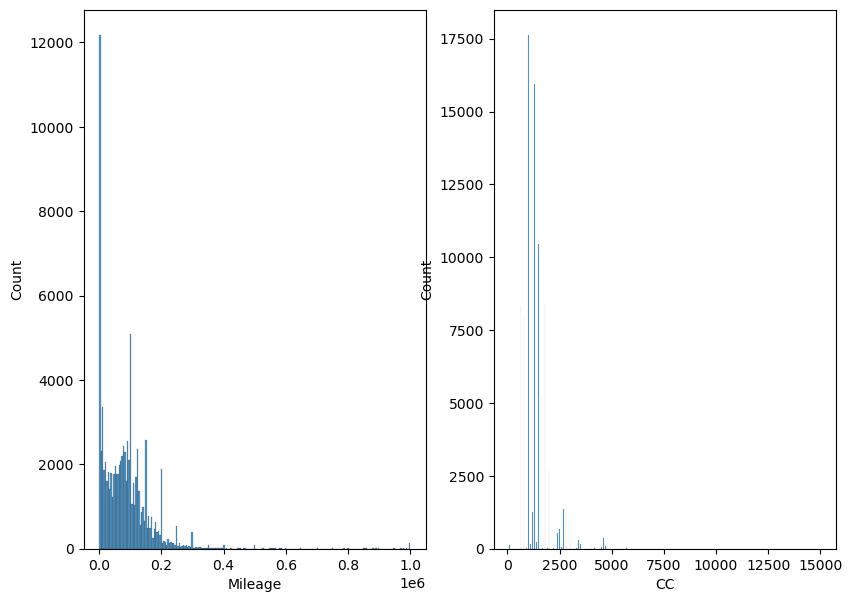

In [20]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
sns.histplot(df['Mileage'])

plt.subplot(1,3,2)
sns.histplot(df['CC'])

In [21]:
out=df['Mileage'].quantile(0.99)
df=df[df['Mileage']<out]

out1=df['CC'].quantile(0.99)
df=df[df['CC']<out1]

<AxesSubplot:xlabel='CC', ylabel='Count'>

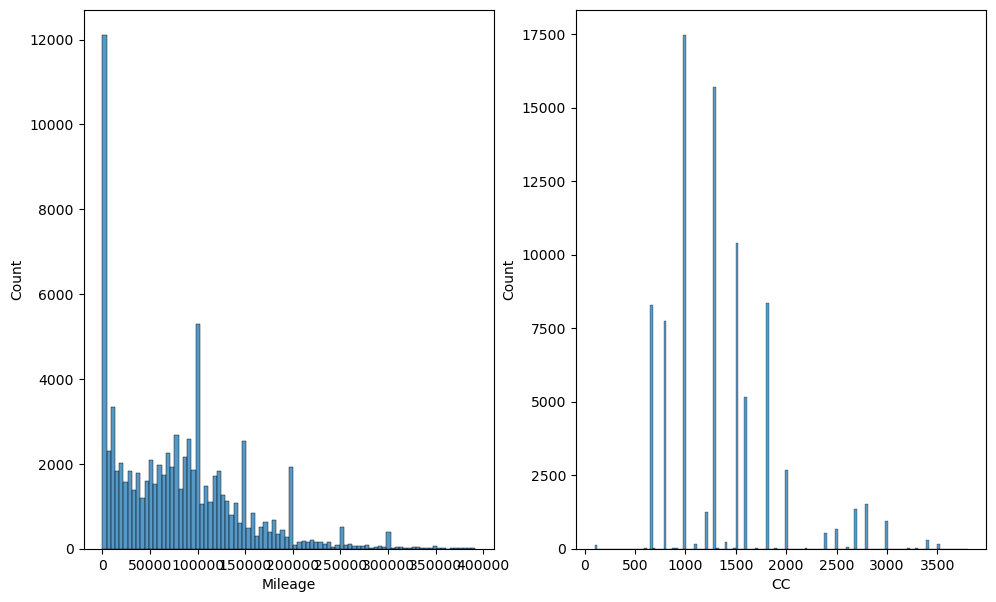

In [22]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(df['Mileage'])

plt.subplot(1,3,2)
sns.histplot(df['CC'])

# Handle values of Year, Transmission and Type column 

In [23]:
df.isna().sum()

Make               0
Year            2106
Mileage            0
Type             746
Transmission       1
CC                 0
Price              1
dtype: int64

In [24]:
df=df[~df['Year'].isna()]
df=df[~df['Type'].isna()]


We will not change unique valus in Type and Year column because filling missing values in these columns will change the features of cars and our model will get confuse in return.

In [26]:

#REMOVE YEAR WITH VALUES LESS THAN 100
df = df[df['Year'] >= 100]



In [28]:
year = df['Year'].value_counts()
year

2022.0    9458
2021.0    6013
2018.0    5371
2017.0    4914
2019.0    4187
2007.0    3867
2015.0    3850
2016.0    3708
2014.0    3535
2012.0    3161
2006.0    3117
2020.0    3116
2013.0    3086
2011.0    2981
2005.0    2728
2010.0    2673
2008.0    2345
2004.0    1953
2009.0    1727
2003.0    1440
2002.0     907
2000.0     815
2001.0     766
1998.0     691
1996.0     677
1999.0     648
1997.0     616
1995.0     563
1994.0     440
1993.0     383
1992.0     363
1990.0     302
1991.0     281
Name: Year, dtype: int64

In [29]:
Type= df['Type'].value_counts()
Type

Petrol    74776
Diesel     3147
Hybrid     2759
Name: Type, dtype: int64

In [30]:
Transmission= df['Transmission'].value_counts()
Transmission

Automatic    41909
Manual       38773
Name: Transmission, dtype: int64

# Handle values under Price column

In [ ]:
df['Price'].unique

We have values in lacs and crore. Lets convert them all to lacks.

In [31]:
df = df[df.Price != 'Call for price'] #remove values with no price


In [32]:
import pandas as pd

def convert_to_numeric_pkr(value):
    parts = value.split()
    numeric_value = float(parts[1])
    
    if "lacs" in value:
        numeric_value *= 100000  # 1 lakh = 100,000
    elif "crore" in value:
        numeric_value *= 10000000  # 1 crore = 10,000,000
    
    return numeric_value

df['Price'] = df['Price'].apply(convert_to_numeric_pkr)




In [33]:
print(df['Price'].astype(float).head(3))

0    1650000.0
1     700000.0
2     760000.0
Name: Price, dtype: float64


In [34]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
outliers


,Make,Year,Mileage,Type,Transmission,CC,Price
3,Toyota,2013.0,94000.0,Petrol,Automatic,2700.0,7000000.0
14,Toyota,2022.0,50.0,Diesel,Automatic,2800.0,11500000.0
22,Honda,2017.0,38603.0,Petrol,Automatic,2400.0,9075000.0
28,Toyota,2016.0,9000.0,Petrol,Automatic,3500.0,13500000.0
36,Honda,2019.0,45000.0,Petrol,Automatic,1500.0,10500000.0
...,...,...,...,...,...,...,...
89670,Hyundai,2022.0,1.0,Petrol,Automatic,2000.0,7600000.0
89695,Toyota,2020.0,45000.0,Diesel,Automatic,2800.0,12200000.0
89712,Toyota,2022.0,3900.0,Diesel,Automatic,2800.0,12700000.0
89771,Toyota,2022.0,2000.0,Diesel,Automatic,2800.0,22000000.0


<AxesSubplot:xlabel='Price', ylabel='Count'>

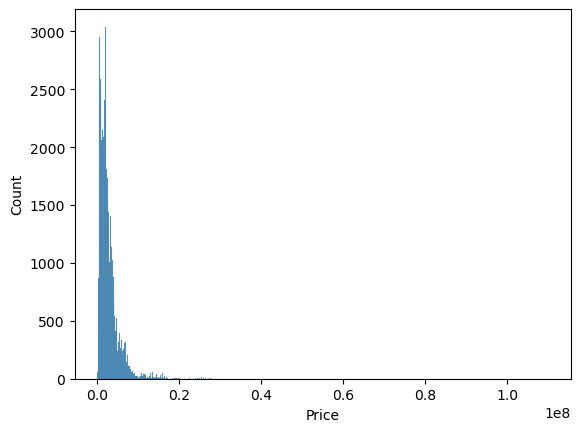

In [35]:
sns.histplot(data=df, x='Price')

In [39]:
out=df['Price'].quantile(0.99)
df=df[df['Price']<out]

<AxesSubplot:xlabel='Price', ylabel='Count'>

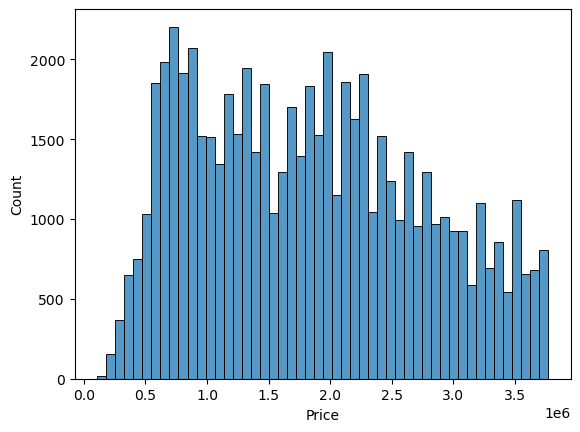

In [40]:
sns.histplot(data=df, x='Price')

In [41]:
df.head()

,Make,Year,Mileage,Type,Transmission,CC,Price
0,Honda,2007.0,100000.0,Petrol,Automatic,1800.0,1650000.0
1,Suzuki,2012.0,100000.0,Petrol,Manual,800.0,700000.0
2,Honda,1995.0,999.0,Petrol,Manual,1500.0,760000.0
4,Suzuki,2015.0,86000.0,Petrol,Manual,796.0,800000.0
5,Toyota,2012.0,85000.0,Petrol,Automatic,1600.0,2550000.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62625 entries, 0 to 89955
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          62625 non-null  object 
 1   Year          62625 non-null  float64
 2   Mileage       62625 non-null  float64
 3   Type          62625 non-null  object 
 4   Transmission  62625 non-null  object 
 5   CC            62625 non-null  float64
 6   Price         62625 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.8+ MB


Lets save this cleaned dataset.

# Holdout Set

In [43]:
from sklearn.model_selection import train_test_split

train_df, hold_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the train and test DataFrames to CSV files
train_df.to_csv('train.csv', index=False)
hold_df.to_csv('test.csv', index=False)

print("Data split and saved to train.csv and test.csv.")

Data split and saved to train.csv and test.csv.


In [44]:
print(train_df.shape)
print(hold_df.shape)

(50100, 7)
(12525, 7)


# Read Dataset

In [45]:
df = pd.read_csv(r'C:\Users\Wasim\train.csv')
df.head()

,Make,Year,Mileage,Type,Transmission,CC,Price
0,Toyota,1997.0,60000.0,Petrol,Automatic,3400.0,3600000.0
1,Suzuki,2012.0,100000.0,Petrol,Manual,800.0,525000.0
2,Honda,2017.0,93000.0,Petrol,Manual,1300.0,2630000.0
3,Honda,2006.0,160000.0,Petrol,Manual,1300.0,1285000.0
4,Suzuki,2007.0,100000.0,Petrol,Manual,800.0,550000.0


# ENCODING

Label encoder: Output

Ordinal encoder:Ordinal features

One hot encoder:Nominal features

In [46]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder  #fit of train and transform on train & test data

 
le = LabelEncoder()
df['Make']=le.fit_transform(df['Make'])

le = LabelEncoder()
df['Year']=le.fit_transform(df['Year'])

#label encode make



In [47]:
#type_trans = df.iloc[:, 3:5]
#print(type_trans)
#ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [48]:
#columnsdata=['Type1','Type2','Transmission']
#encoded_features = pd.DataFrame(data=ohe.fit_transform(type_trans), columns = columnsdata)
#encoded_features
type_trans = df.iloc[:, 3:5]

pd.get_dummies(data=type_trans,drop_first=True)


,Type_Hybrid,Type_Petrol,Transmission_Manual
0,0,1,0
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
...,...,...,...
50095,0,1,1
50096,0,1,1
50097,0,1,0
50098,0,1,0


In [49]:
df=pd.get_dummies(data=df, columns=['Type', 'Transmission'], drop_first=True)


In [50]:
#df = df.drop(columns=['Type', 'Transmission'])

In [51]:
df.head()

,Make,Year,Mileage,CC,Price,Type_Hybrid,Type_Petrol,Transmission_Manual
0,8,7,60000.0,3400.0,3600000.0,0,1,0
1,7,22,100000.0,800.0,525000.0,0,1,1
2,2,27,93000.0,1300.0,2630000.0,0,1,1
3,2,16,160000.0,1300.0,1285000.0,0,1,1
4,7,17,100000.0,800.0,550000.0,0,1,1


In [52]:
#encoded_df = pd.concat([df, encoded_features], axis=1)

In [53]:
#encoded_df.head()

In [54]:

df

,Make,Year,Mileage,CC,Price,Type_Hybrid,Type_Petrol,Transmission_Manual
0,8,7,60000.0,3400.0,3600000.0,0,1,0
1,7,22,100000.0,800.0,525000.0,0,1,1
2,2,27,93000.0,1300.0,2630000.0,0,1,1
3,2,16,160000.0,1300.0,1285000.0,0,1,1
4,7,17,100000.0,800.0,550000.0,0,1,1
...,...,...,...,...,...,...,...,...
50095,7,22,65000.0,800.0,780000.0,0,1,1
50096,7,27,36000.0,660.0,2350000.0,0,1,1
50097,2,19,124000.0,1800.0,2000000.0,0,1,0
50098,2,18,120000.0,1800.0,1580000.0,0,1,0


# Feature scaling

<AxesSubplot:xlabel='CC', ylabel='Count'>

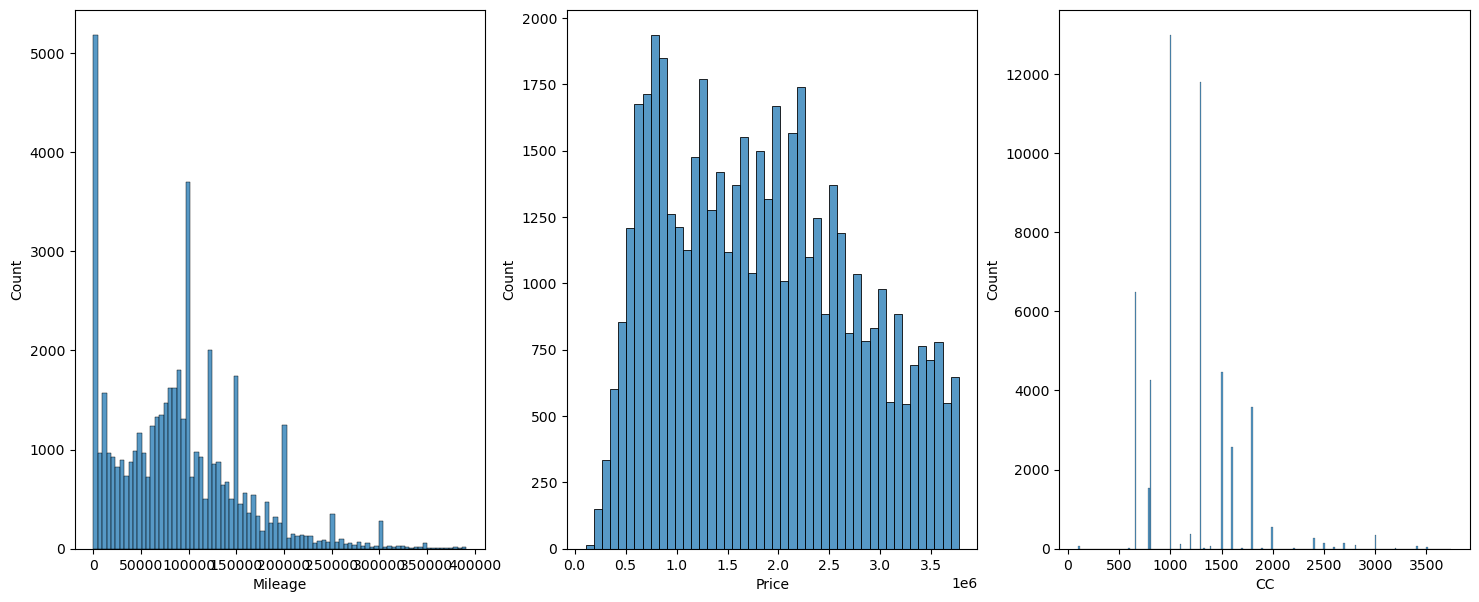

In [55]:
#check distributions of dataset first.
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(df['Mileage'])

plt.subplot(1,3,2)
sns.histplot(df['Price'])

plt.subplot(1,3,3)
sns.histplot(df['CC'])

In [56]:
#skewness - fare column

#from sklearn.preprocessing import RobustScaler
#r_scaler = RobustScaler()
#df.iloc[:,2:5] = r_scaler.fit_transform(df.iloc[:,2:5])


from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
df.iloc[:,2:5] = s_scaler.fit_transform(df.iloc[:,2:5])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 50100 non-null  int32  
 1   Year                 50100 non-null  int64  
 2   Mileage              50100 non-null  float64
 3   CC                   50100 non-null  float64
 4   Price                50100 non-null  float64
 5   Type_Hybrid          50100 non-null  uint8  
 6   Type_Petrol          50100 non-null  uint8  
 7   Transmission_Manual  50100 non-null  uint8  
dtypes: float64(3), int32(1), int64(1), uint8(3)
memory usage: 1.9 MB


<AxesSubplot:xlabel='CC', ylabel='Count'>

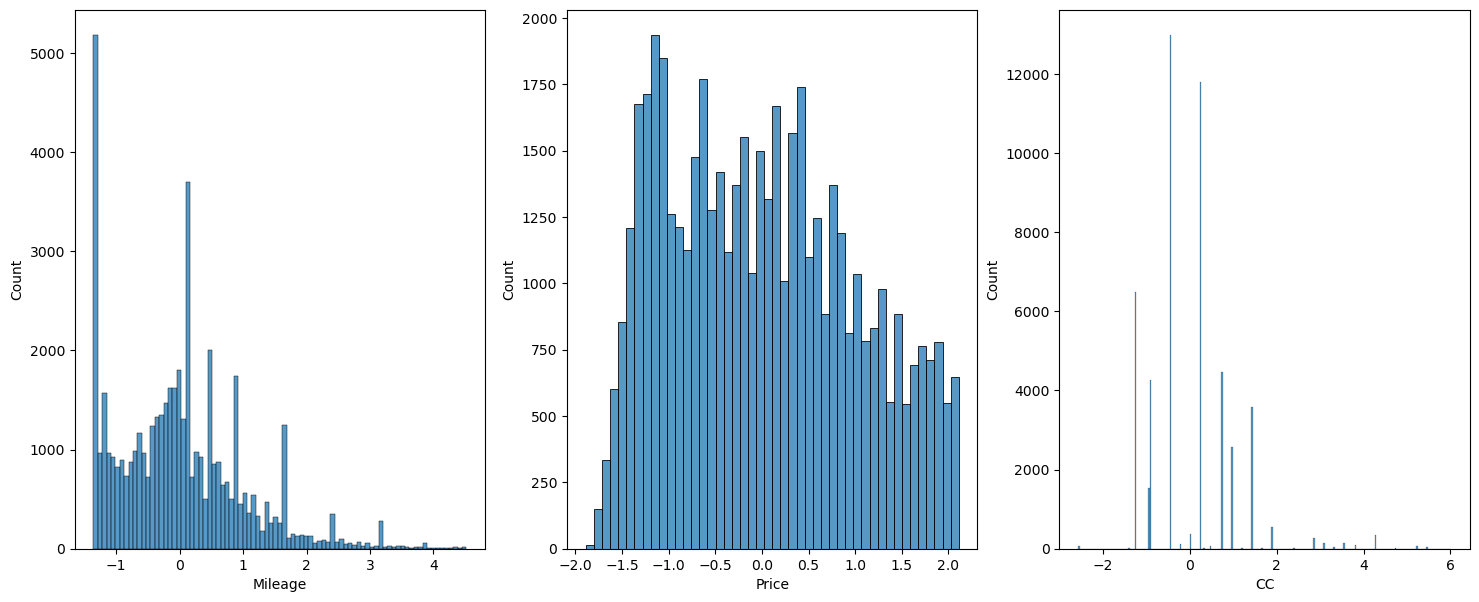

In [58]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(df['Mileage'])

plt.subplot(1,3,2)
sns.histplot(df['Price'])

plt.subplot(1,3,3)
sns.histplot(df['CC'])

In [59]:

#df['price']=np.log(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

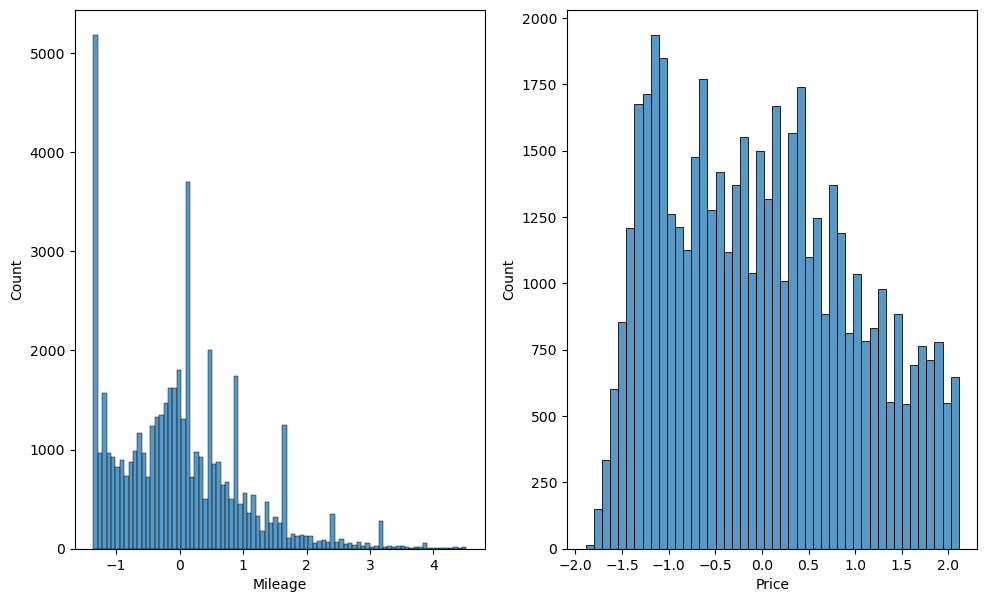

In [60]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(df['Mileage'])

plt.subplot(1,3,2)
sns.histplot(df['Price'])

# Train-Test Split

In [61]:
df.head()

,Make,Year,Mileage,CC,Price,Type_Hybrid,Type_Petrol,Transmission_Manual
0,8,7,-0.456042,5.211620,1.925801,0,1,0
1,7,22,0.144247,-0.917158,-1.434727,0,1,1
2,2,27,0.039196,0.261453,0.865732,0,1,1
3,2,16,1.044680,0.261453,-0.604158,0,1,1
4,7,17,0.144247,-0.917158,-1.407406,0,1,1


In [62]:
#Method 1

y = df['Price']
X = df.drop('Price', axis=1)

In [63]:
print(X)


       Make  Year   Mileage        CC  Type_Hybrid  Type_Petrol  \
0         8     7 -0.456042  5.211620            0            1   
1         7    22  0.144247 -0.917158            0            1   
2         2    27  0.039196  0.261453            0            1   
3         2    16  1.044680  0.261453            0            1   
4         7    17  0.144247 -0.917158            0            1   
...     ...   ...       ...       ...          ...          ...   
50095     7    22 -0.381006 -0.917158            0            1   
50096     7    27 -0.816215 -1.247169            0            1   
50097     2    19  0.504420  1.440064            0            1   
50098     2    18  0.444391  1.440064            0            1   
50099     7    22 -0.095869 -0.445714            0            1   

       Transmission_Manual  
0                        0  
1                        1  
2                        1  
3                        1  
4                        1  
...                  

In [64]:
print(y)

0        1.925801
1       -1.434727
2        0.865732
3       -0.604158
4       -1.407406
           ...   
50095   -1.156049
50096    0.559733
50097    0.177234
50098   -0.281765
50099   -0.992121
Name: Price, Length: 50100, dtype: float64


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_train), len(y_train), len(X_test), len(y_test)

(40080, 40080, 10020, 10020)

In [66]:
df.isna().sum()

Make                   0
Year                   0
Mileage                0
CC                     0
Price                  0
Type_Hybrid            0
Type_Petrol            0
Transmission_Manual    0
dtype: int64

# Train Model

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

In [ ]:

y_pred = rf_regressor.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Cross Validation

The scoring argument of cross_validate() method:

By default cross_val_score() and cross_validate() methods uses the chosen model’s default
scoring metric, but this can be overridden by specifying the scoring metric in the scoring parameter.

For cross_Val_score() this can be a single scoring metric, while for cross_validate() you can
pass either a single metric or multiple as a list to the scoring argument.

scoring=None - means defailt scoring metric.



In [ ]:
#cross_val_score(estimator, X, y=None, cv=None, scoring=None,return_train_score=True, return_estimator=True)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, f1_score


kf = KFold(n_splits=5, shuffle=False)
result_dict = cross_validate(RandomForestRegressor(n_estimators=100, random_state=42), X, y, cv=kf, scoring=('r2'),return_train_score=True)


In [ ]:
array=pd.DataFrame(result_dict)
print(array)

average_accuracy_test =array['test_score'].sum()/5
average_accuracy_train =array['train_score'].sum()/5


In [ ]:
print("average train accuracy:", average_accuracy_train)
print("average test accuracy:", average_accuracy_test)

# Finding Best Hyper-parameters

In [ ]:
model = RandomForestRegressor() 
model.get_params() #get all parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint




In [ ]:
param_dist = {
    'n_estimators': randint(10, 100),          # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 5),            
    'min_samples_split': randint(2, 7),      
    'min_samples_leaf': randint(1, 7)      
}


rf_regressor = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error'
)

In [ ]:
random_search.fit(X_train, y_train)

print("Best Score: ", random_search.best_score_)
print("Best Score: ", random_search.best_params_)

# Pipelining all dataset:

In [ ]:
df = pd.read_csv(r'C:\Users\Wasim\train.csv')
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

 
Encode_onehot = Pipeline(steps=[('onehot', OneHotEncoder(drop='first',sparse=False,dtype=np.int32))])
                               
transform_1 = Pipeline(steps=[('standardscalar', StandardScaler())])

    

In [ ]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer( transformers=[
    
 ('E1', Encode_onehot, [0,1,3,4]),
 ('T1', transform_1, [2,5])

 ])


preprocessor



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline(steps=[
 ('preprocessor', preprocessor),
 ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
 ])

len(X_train), len(y_train), len(X_test), len(y_test)

# Fit the pipeline on the training data
pipe


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=pipe.predict(X_test)
accuracy= r2_score(y_pred,y_test)
print(accuracy)

# Train model on complete dataset

In [ ]:
pipe.fit(X, y)

In [ ]:
import joblib
joblib.dump(pipe,'project_model.pkl')